In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_spd_matrix

In [3]:
import sys
sys.path.insert(1, '/Users/ersi/Documents/ott/')

In [4]:
from ott.tools.gaussian_mixture import gaussian_mixture

In [5]:
from ott.core import bar_problems
from ott.core import continuous_barycenter
from ott.geometry import costs
from gauss_mixture_utils import gauss_mixture_mean_and_cov_to_pointcloud, gauss_mixture_pointcloud_to_mean_and_cov
d = 2  # dimensionality

In [6]:
key = jax.random.PRNGKey(0)

In [7]:
sample_size = 2000

In [8]:
num_of_components = 2

In [9]:
keys = jax.random.split(key, num=2*num_of_components+3)

In [10]:
d = 2 # dimension

In [11]:
seeds = [2, 5, 12]

In [12]:
means1 = jnp.asarray([jax.random.randint(key=keys[i], shape=(d,), minval=-10, maxval=10) for i in range(num_of_components)])

In [13]:
covs1 = 1 * jnp.asarray([make_spd_matrix(n_dim=d, random_state=seeds[i])
                    for i in range(num_of_components)])

In [14]:
#weights1 = jnp.asarray([0.3, 0.3, 0.4])

In [15]:
weights1 = jnp.asarray([0.5, 0.5])

In [16]:
gmm_generator1 = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means1,
                                                                                 cov=covs1,
                                                                                 component_weights=weights1)

In [17]:
samples1 = gmm_generator1.sample(key=keys[-1], size=sample_size)

In [18]:
means2 = jnp.asarray([jax.random.randint(key=keys[i + num_of_components], shape=(d,), minval=-10, maxval=10) for i in range(num_of_components)])

In [19]:
covs2 = 1 * jnp.asarray([make_spd_matrix(n_dim=d, random_state=seeds[i])
                    for i in range(num_of_components)])

In [20]:
# weights2 = jnp.asarray([0.3, 0.3, 0.4])

In [21]:
weights2 = jnp.asarray([0.5, 0.5])

In [22]:
gmm_generator2 = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means2,
                                                                                 cov=covs2,
                                                                                 component_weights=weights2)

In [23]:
samples2 = gmm_generator2.sample(key=keys[-2], size=sample_size)

In [24]:
pointcloud1 = gauss_mixture_mean_and_cov_to_pointcloud(means=means1, covariances=covs1, dimension=d, num_components=num_of_components)

In [25]:
pointcloud2 = gauss_mixture_mean_and_cov_to_pointcloud(means=means2, covariances=covs2, dimension=d, num_components=num_of_components)

In [26]:
y = jnp.concatenate((pointcloud1, pointcloud2))

In [27]:
b = jnp.concatenate((weights1, weights2))

In [28]:
b

DeviceArray([0.5, 0.5, 0.5, 0.5], dtype=float32)

In [29]:
bar_p = bar_problems.BarycenterProblem(
      y, b, num_per_segment=jnp.asarray([num_of_components, num_of_components]), num_segments=2, max_measure_size=num_of_components,
      cost_fn = costs.Bures(dimension=d),
      epsilon=0.1)

In [30]:
solver = continuous_barycenter.WassersteinBarycenter()

In [31]:
bar_size = 2
weights_bary = jnp.ones(bar_size) / bar_size
out = solver(bar_p, bar_size=bar_size)
barycenter = out.x

In [32]:
means_bary, covs_bary = gauss_mixture_pointcloud_to_mean_and_cov(pointcloud=barycenter, dimension=d, num_components=bar_size)

In [33]:
gmm_generator_bary = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means_bary,
                                                                                      cov=covs_bary,
                                                                                      component_weights=weights_bary)

In [34]:
samples_bary = gmm_generator_bary.sample(key=keys[-3], size=sample_size)

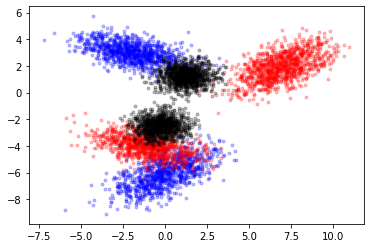

In [35]:
# Plot samples
plt.scatter(samples1[:, 0], samples1[:, 1], marker='.', alpha=0.25, c='b')
plt.scatter(samples2[:, 0], samples2[:, 1], marker='.', alpha=0.25, c='r')
plt.scatter(samples_bary[:, 0], samples_bary[:, 1], marker='.', alpha=0.25, c='k')
plt.show()

In [36]:
means_bary

DeviceArray([[ 1.2500304,  1.2500066],
             [-0.25     , -2.4999964]], dtype=float32)

In [37]:
means1

DeviceArray([[-2,  3],
             [ 0, -6]], dtype=int32)

In [38]:
means2

DeviceArray([[-1, -4],
             [ 7,  2]], dtype=int32)